In [1]:
import librosa
import librosa.display

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
filename= 'D:\\user\\sandeep\\UrbanSound8K\\dog_bark.wav'

In [4]:
import IPython.display as ipd

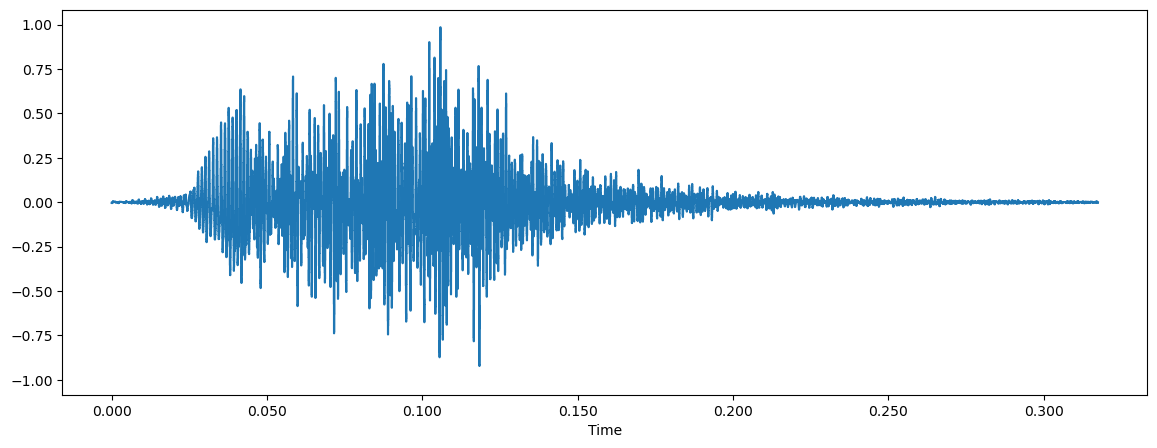

In [5]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)



In [6]:
sample_rate

22050

In [7]:
data

array([-0.00347107, -0.00501926, -0.00465448, ..., -0.00248442,
       -0.00154777, -0.00035547], dtype=float32)

In [8]:
import pandas as pd
import numpy as np

metadata = pd.read_csv('D:\\user\\sandeep\\UrbanSound8K\\metadata\\UrbanSound8K.csv')

In [9]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [11]:
import os

In [12]:
audio_dataset_path ='D:\\user\\sandeep\\UrbanSound8K\\audio\\'


In [13]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [14]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfcc_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfcc_scaled_features

In [15]:
from tqdm import tqdm

In [16]:
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'\\',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [04:29, 14.43it/s]D:\user\sandeep\envs\audio\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [10:12, 19.71it/s]D:\user\sandeep\envs\audio\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8329it [10:12, 24.19it/s]D:\user\sandeep\envs\audio\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [10:40, 13.64it/s]


In [17]:
###converting extracted features to pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [18]:
##splitting datset to independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [19]:
X.shape

(8732, 40)

In [20]:
###label Encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder =LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [21]:
y.shape

(8732, 10)

In [22]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train.shape

(6985, 40)

In [24]:
X_test.shape

(1747, 40)

In [25]:
y_test.shape

(1747, 10)

In [26]:
y_train.shape

(6985, 10)

In [27]:
import tensorflow as tf

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [29]:
num_labels=y.shape[1]

In [30]:
model=Sequential()
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [32]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [70]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=100
num_batch_size=32

checkpointer = ModelCheckpoint(filepath='D:\\user\\sandeep\\UrbanSound8K\\saved_models\\audi-_classification.hdf5',verbose=1,save_best_only = True)

start = datetime.now()

model.fit(X_train,y_train,batch_size=num_batch_size, epochs= num_epochs ,validation_data=(X_test,y_test),callbacks=[checkpointer])

duration = datetime.now() - start 

print("Training duration:",duration)

Epoch 1/100
201/219 [==========================>...] - ETA: 0s - loss: 0.9974 - accuracy: 0.6553
Epoch 1: val_loss improved from inf to 0.77474, saving model to D:\user\sandeep\UrbanSound8K\saved_models\audi-_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 0.9907 - accuracy: 0.6578 - val_loss: 0.7747 - val_accuracy: 0.7579
Epoch 2/100
214/219 [============================>.] - ETA: 0s - loss: 0.9710 - accuracy: 0.6776
Epoch 2: val_loss improved from 0.77474 to 0.76250, saving model to D:\user\sandeep\UrbanSound8K\saved_models\audi-_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 0.9703 - accuracy: 0.6785 - val_loss: 0.7625 - val_accuracy: 0.7607
Epoch 3/100
219/219 [==============================] - ETA: 0s - loss: 0.9678 - accuracy: 0.6700
Epoch 3: val_loss did not improve from 0.76250
219/219 [==============================] - 1s 3ms/step - loss: 0.9678 - accuracy: 0.6700 - val_loss: 0.7661 - val_accuracy: 0.7602
E

In [71]:
test_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7945048809051514


In [79]:
filename = "D:\\user\\sandeep\\UrbanSound8K\\streetmusic.wav"

In [80]:
prediction_feature=features_extractor(filename)

In [81]:
prediction_feature=prediction_feature.reshape(1,-1)

In [82]:

prediction=model.predict(prediction_feature)

1/1 [==============================] - 0s 21ms/step


In [83]:
classes_x=np.argmax(prediction,axis=1)

In [84]:
predicted_class = labelencoder.inverse_transform(classes_x)

In [85]:
predicted_class

array(['street_music'], dtype='<U16')